# Actividad 2 Clase 9
- Jorge Emiliano Pomar 
- A01709338
- 29 de abril de 2025

## Modelo 1

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [108]:
data = pd.read_csv('diabetes2.csv')
X = data[['Glucose', 'BMI']]
y = data['Outcome']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[0.49246231, 0.50670641],
       [0.56281407, 0.53204173],
       [0.54271357, 0.45901639],
       [0.53768844, 0.36661699],
       [0.68341709, 0.44560358]])

In [111]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [112]:
y_pred = model.predict(X_test)

In [113]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[86 13]
 [23 32]]


In [114]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



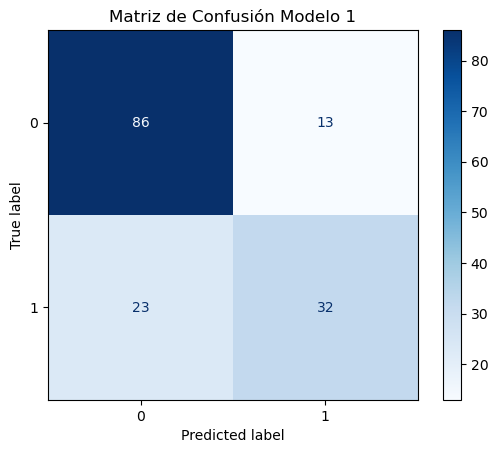

In [115]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión Modelo 1")
plt.show()

# Modelo 2

In [116]:
data2 = pd.read_csv('diabetes2.csv')
X = data2[['Insulin', 'Age', 'BloodPressure']]
y = data2['Outcome']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [118]:
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[0.        , 0.79591837, 0.59016393],
       [0.        , 0.55102041, 0.75409836],
       [0.        , 0.42857143, 0.45081967],
       [0.19858156, 0.24489796, 0.57377049],
       [0.        , 0.65306122, 0.70491803]])

In [119]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [120]:
y_pred = model.predict(X_test)

In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[84 10]
 [53  7]]


In [122]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.89      0.73        94
           1       0.41      0.12      0.18        60

    accuracy                           0.59       154
   macro avg       0.51      0.51      0.45       154
weighted avg       0.53      0.59      0.51       154



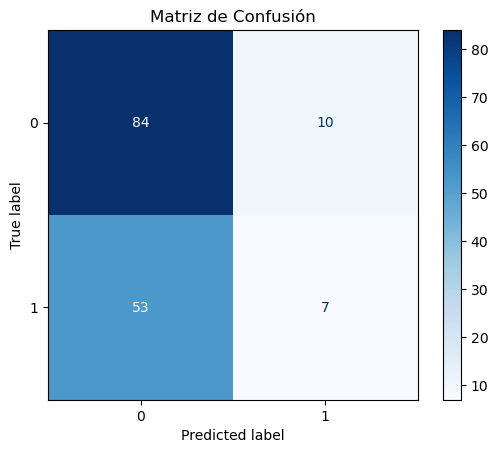

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

## Conclusiones

1. **Modelo 1**:
    - Utilicé Glucosa y BMI como variables porque parecen ser indicadores principales para la diabetes.

2. **Modelo 2**:
    - Utilicé la insulina, la edad y la presión arterial como variables porque son factores de riesgo conocidos para la diabetes. Además pude de random state 21 para dar variar los resultados de la predicción.

### Comparación de los modelos :
- **Precisión y F1-Score**: Ambas métricas tienen mejor desempeño en el Modelo 1 por tener valores más cercanos a 1.0, lo que indica que el modelo es más preciso y tiene un mejor balance entre precisión y recall.
- **Matriz de Confusión**: En el modelo 1, se logran identificar 32 verdaderos positivos, y en el segundo modelo solo se logran identificar 7 verdaderos positivos. Por ende, el modelo 1 tiene un mejor desempeño en la identificación de casos positivos.
- En este caso, se podría tratar de un caso de overfitting porque el modelo 2 utiliza más variables que el modelo 1, lo que podría llevar a un mejor desempeño en el conjunto de entrenamiento pero a un peor desempeño en el conjunto de prueba.

### Conclusión Final:
El modelo más eficiente fue el modelo 1 porque tiene un mejor desempeño en las métricas de precisión y F1-Score, así como en la matriz de confusión. Además, hay más equilibrio en el recall del modelo 1 que en el modelo 2. Por lo tanto, el modelo 1 es más confiable para predecir la diabetes en este conjunto de datos. Tal vez el hecho de que al usar más variables en el modelo 2, se haya hecho un modelo más complejo que no se ajusta bien a los datos de prueba y por lo tanto no logra predecir bien los casos positivos. Viéndolo de una manera enfocada en el diagnostico de la diabetes, esto indica que la glucosa y el BMI son factores más relevantes para predecir la diabetes que la insulina, la edad y la presión arterial. 